In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout



In [2]:
dataset_AMAZON = pd.read_csv('../datasets/AMZN.csv', parse_dates=['Date'])
dataset_MICROSOFT = pd.read_csv('../datasets/MSFT.csv', parse_dates=['Date'])
dataset_GOOGLE = pd.read_csv('../datasets/GOOG.csv', parse_dates=['Date'])


In [3]:
dataset_AMAZON

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000
1,2014-01-03,19.914499,20.135500,19.811001,19.822001,19.822001,44204000
2,2014-01-06,19.792500,19.850000,19.421000,19.681499,19.681499,63412000
3,2014-01-07,19.752001,19.923500,19.714500,19.901501,19.901501,38320000
4,2014-01-08,19.923500,20.150000,19.802000,20.096001,20.096001,46330000
...,...,...,...,...,...,...,...
2582,2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300
2583,2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900
2584,2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200
2585,2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700


In [4]:
AMZN_dataset = pd.read_csv('../datasets/AMZN.csv', parse_dates=['Date'])
MSFT_dataset = pd.read_csv('../datasets/MSFT.csv', parse_dates=['Date'])
GOOG_dataset = pd.read_csv('../datasets/GOOG.csv', parse_dates=['Date'])




In [5]:
AMZN_dataset.replace(0, np.nan, inplace=True)
AMZN_dataset.to_csv("../datasets/AMZN.csv", index=False)

MSFT_dataset.replace(0, np.nan, inplace=True)
MSFT_dataset.to_csv("../datasets/MSFT.csv", index=False)

GOOG_dataset.replace(0, np.nan, inplace=True)
GOOG_dataset.to_csv("../datasets/GOOG.csv", index=False)

In [6]:
datetime_series = pd.to_datetime(AMZN_dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
AMZN_dataset = AMZN_dataset.set_index(datetime_index)
AMZN_dataset = AMZN_dataset.sort_values(by='Date')
AMZN_dataset = AMZN_dataset.drop(columns='Date')

datetime_series = pd.to_datetime(MSFT_dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
MSFT_dataset = MSFT_dataset.set_index(datetime_index)
MSFT_dataset = MSFT_dataset.sort_values(by='Date')
MSFT_dataset = MSFT_dataset.drop(columns='Date')

datetime_series = pd.to_datetime(GOOG_dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
GOOG_dataset = GOOG_dataset.set_index(datetime_index)
GOOG_dataset = GOOG_dataset.sort_values(by='Date')
GOOG_dataset = GOOG_dataset.drop(columns='Date')



In [7]:
AMZN_X_value = pd.DataFrame(AMZN_dataset.iloc[:, :])
AMZN_y_value = pd.DataFrame(AMZN_dataset.iloc[:, 3])

MSFT_X_value = pd.DataFrame(MSFT_dataset.iloc[:, :])
MSFT_y_value = pd.DataFrame(MSFT_dataset.iloc[:, 3])

GOOG_X_value = pd.DataFrame(GOOG_dataset.iloc[:, :])
GOOG_y_value = pd.DataFrame(GOOG_dataset.iloc[:, 3])


In [8]:
GOOG_X_value

,Open,High,Low,Close,Adj Close,Volume
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800
2024-04-08,154.014999,156.654999,153.990005,156.139999,156.139999,16641500
2024-04-09,157.350006,159.889999,156.639999,158.139999,158.139999,21538100
2024-04-10,157.880005,158.160004,156.199997,157.660004,157.660004,16339200


In [9]:
GOOG_y_value

,Close
2014-01-02,27.724083
2014-01-03,27.521841
2014-01-06,27.828691
2014-01-07,28.365179
2014-01-08,28.424210
...,...
2024-04-05,153.940002
2024-04-08,156.139999
2024-04-09,158.139999
2024-04-10,157.660004


In [10]:
# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))


In [11]:
X_scaler.fit(AMZN_X_value)
y_scaler.fit(AMZN_y_value)

AMZN_X_scale_dataset = X_scaler.fit_transform(AMZN_X_value)
AMZN_y_scale_dataset = y_scaler.fit_transform(AMZN_y_value)

In [12]:
X_scaler.fit(MSFT_X_value)
y_scaler.fit(MSFT_y_value)

MSFT_X_scale_dataset = X_scaler.fit_transform(MSFT_X_value)
MSFT_y_scale_dataset = y_scaler.fit_transform(MSFT_y_value)

In [13]:
X_scaler.fit(GOOG_X_value)
y_scaler.fit(GOOG_y_value)

GOOG_X_scale_dataset = X_scaler.fit_transform(GOOG_X_value)
GOOG_y_scale_dataset = y_scaler.fit_transform(GOOG_y_value)

In [14]:
n_steps_in = 3
n_features = AMZN_X_value.shape[1]
n_steps_out = 1

In [15]:
print(n_steps_in)
print(n_features)
print(n_steps_out)

3
6
1


In [16]:
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

In [17]:
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

In [18]:
def split_train_test(data):
    train_size = round(len(data) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [19]:
AMZN_X,  AMZN_y,  AMZN_yc = get_X_y(AMZN_X_scale_dataset, AMZN_y_scale_dataset)
AMZN_X_train,  AMZN_X_test  =  split_train_test(AMZN_X)
AMZN_y_train, AMZN_y_test  =  split_train_test(AMZN_y)
AMZN_yc_train, AMZN_yc_test, = split_train_test(AMZN_yc)
AMZN_index_train, AMZN_index_test, = predict_index(AMZN_dataset, AMZN_X_train, n_steps_in, n_steps_out)

In [20]:
MSFT_X,  MSFT_y,  MSFT_yc = get_X_y(MSFT_X_scale_dataset, MSFT_y_scale_dataset)
MSFT_X_train,  MSFT_X_test  =  split_train_test(MSFT_X)
MSFT_y_train, MSFT_y_test  =  split_train_test(MSFT_y)
MSFT_yc_train, MSFT_yc_test, = split_train_test(MSFT_yc)
MSFT_index_train, MSFT_index_test, = predict_index(MSFT_dataset, MSFT_X_train, n_steps_in, n_steps_out)

In [21]:
GOOG_X,  GOOG_y,  GOOG_yc = get_X_y(GOOG_X_scale_dataset, GOOG_y_scale_dataset)
GOOG_X_train,  GOOG_X_test  =  split_train_test(GOOG_X)
GOOG_y_train, GOOG_y_test  =  split_train_test(GOOG_y)
GOOG_yc_train, GOOG_yc_test, = split_train_test(GOOG_yc)
GOOG_index_train, GOOG_index_test, = predict_index(GOOG_dataset, GOOG_X_train, n_steps_in, n_steps_out)

In [22]:
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 180

In [23]:
input_dim = AMZN_X_train.shape[1]
feature_size = AMZN_X_train.shape[2]
output_dim = AMZN_y_train.shape[1]

In [24]:
def make_generator_model(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(LSTM(units=512, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(units=256, recurrent_dropout=0.2))
    model.add(Dense(128))
    model.add(Dense(units=output_dim))
    return model


In [25]:
def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

In [26]:
model = make_discriminator_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             10304     
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            41088     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 220)               28160     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 220)               4

In [27]:
class GAN:
    def __init__(self, generator, discriminator, opt , X_test):
        self.opt = opt
        self.lr = opt["lr"]
        self.X_test = X_test
        self.generator = generator
        self.discriminator = discriminator
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
        self.generator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(lr=self.lr)
        self.batch_size = self.opt['bs']
        self.checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                              discriminator_optimizer=self.discriminator_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_data = self.generator(real_x, training=True)
            generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
            d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
            real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
            d_real_input = tf.concat([real_y_reshape, yc], axis=1)

            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}

    def train(self, real_x, real_y, yc, opt):
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []

        epochs = opt["epoch"]
        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(real_x, real_y, yc)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price.numpy())
            Real_price.append(real_price.numpy())

            if (epoch + 1) % 15 == 0:
                print('epoch', epoch + 1, 'd_loss', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        test_predicted_price = self.generator.predict(self.X_test)

        plt.figure(figsize=(16, 8))
        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        return Predicted_price, Real_price, test_predicted_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

c:\Users\cs20b\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


epoch 15 d_loss 1.3324273 g_loss 0.74833596
epoch 30 d_loss 1.3783058 g_loss 0.70992047
epoch 45 d_loss 1.337119 g_loss 0.7207499
epoch 60 d_loss 1.3853898 g_loss 0.6920248
epoch 75 d_loss 1.3601562 g_loss 0.72608566
epoch 90 d_loss 1.3881621 g_loss 0.7254887
epoch 105 d_loss 1.3682201 g_loss 0.8784321
epoch 120 d_loss 1.4144766 g_loss 0.60912
epoch 135 d_loss 1.3889573 g_loss 0.6761244
epoch 150 d_loss 1.3880053 g_loss 0.6801759
epoch 165 d_loss 1.3873882 g_loss 0.6871485
25/25 [==============================] - 1s 15ms/step


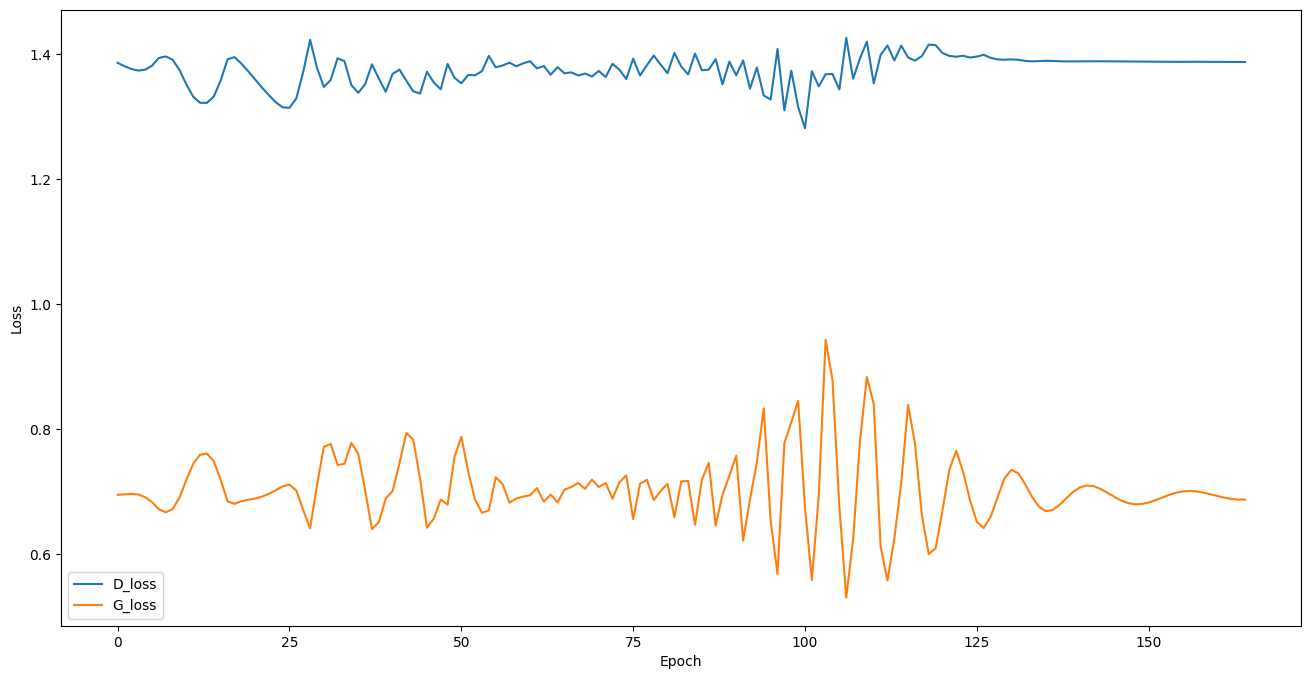

In [28]:
if __name__ == '__main__':
    
    opt = {"lr": 0.00016, "epoch": 165, 'bs': 128}

    generator = make_generator_model( input_dim, output_dim, feature_size)
    discriminator = make_discriminator_model()
    gan = GAN(generator, discriminator, opt , AMZN_X_test)

    Predicted_price, Real_price, test_predicted_price, RMSPE = gan.train(AMZN_X_train, AMZN_y_train, AMZN_yc_train, opt  )

In [29]:
AMZN_rescaled_Real_price = y_scaler.inverse_transform(Real_price)
AMZN_rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

In [30]:
predict_result = pd.DataFrame()
for i in range(AMZN_rescaled_Predicted_price.shape[0]):
    y_predict = pd.DataFrame(AMZN_rescaled_Predicted_price[i], columns=["predicted_price"], index=AMZN_index_train[i:i+output_dim])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

real_price = pd.DataFrame()
for i in range(AMZN_rescaled_Real_price.shape[0]):
    y_train = pd.DataFrame(AMZN_rescaled_Real_price[i], columns=["real_price"], index=AMZN_index_train[i:i+output_dim])
    real_price = pd.concat([real_price, y_train], axis=1, sort=False)

predict_result['predicted_mean'] = predict_result.mean(axis=1)
real_price['real_mean'] = real_price.mean(axis=1)

C:\Users\cs20b\AppData\Local\Temp\ipykernel_15760\2508900621.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
C:\Users\cs20b\AppData\Local\Temp\ipykernel_15760\2508900621.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


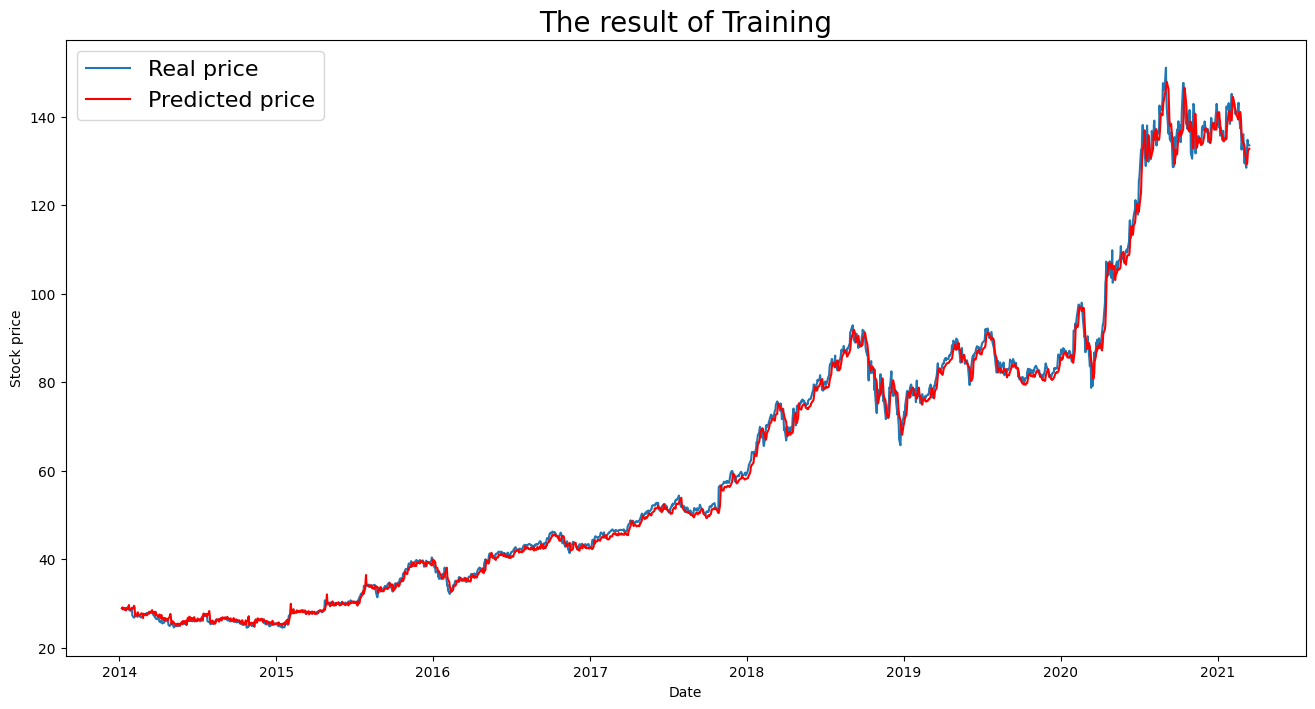

In [31]:
# Plot the predicted result
plt.figure(figsize=(16, 8))
plt.plot(real_price["real_mean"])
plt.plot(predict_result["predicted_mean"], color = 'r')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
plt.title("The result of Training", fontsize=20)
plt.show()



In [32]:
AMZN_dataset

,Open,High,Low,Close,Adj Close,Volume
2014-01-02,19.940001,19.968000,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.135500,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.850000,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.923500,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.150000,19.802000,20.096001,20.096001,46330000
...,...,...,...,...,...,...
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700


C:\Users\cs20b\AppData\Local\Temp\ipykernel_15760\1003438553.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result_test['predicted_mean'] = predict_result_test.mean(axis=1)


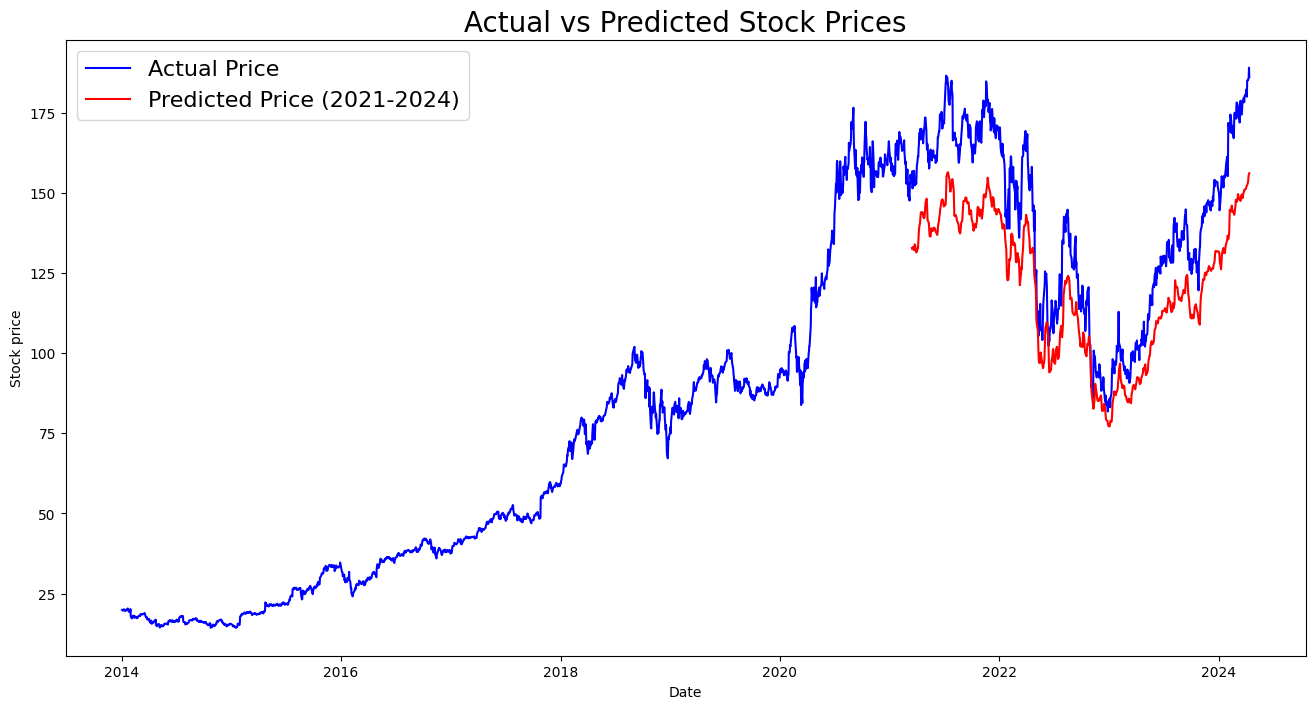

In [33]:
# Change Dataset below for predictions:
# dataset_AMAZON 
# dataset_MICROSOFT 
# dataset_GOOGLE 

dataset = dataset_AMAZON     


end_date = pd.to_datetime('2024-12-31')
actual_price = dataset[dataset['Date'] <= end_date][['Date', 'Close']]
actual_price = actual_price.rename(columns={'Close': 'Closing'})


rescaled_test_predicted_price = y_scaler.inverse_transform(test_predicted_price)

predict_result_test = pd.DataFrame()
for i in range(rescaled_test_predicted_price.shape[0]):
    y_predict = pd.DataFrame(rescaled_test_predicted_price[i], columns=["predicted_price"], index=AMZN_index_test[i:i+output_dim])
    predict_result_test = pd.concat([predict_result_test, y_predict], axis=1, sort=False)

predict_result_test['predicted_mean'] = predict_result_test.mean(axis=1)


start_date = pd.to_datetime('2020-12-14')
end_date = pd.to_datetime('2024-12-31')
start_index = predict_result_test.index.searchsorted(start_date)
end_index = predict_result_test.index.searchsorted(end_date, side='right')
predicted_price = predict_result_test['predicted_mean'][start_index:end_index]


plt.figure(figsize=(16, 8))
plt.plot(actual_price['Date'], actual_price['Closing'], color='b', label='Actual Price')
plt.plot(predicted_price.index, predicted_price, color='r', label='Predicted Price (2021-2024)')
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(loc="upper left", fontsize=16)
plt.title("Actual vs Predicted Stock Prices", fontsize=20)
plt.show()

In [34]:
actual_price['Closing'].iloc[start_index:end_index]


0      19.898500
1      19.822001
2      19.681499
3      19.901501
4      20.096001
         ...    
770    41.122002
771    41.826000
772    41.957500
773    41.788502
774    41.519001
Name: Closing, Length: 775, dtype: float64

In [35]:
# Calculate RMSE
actual_values = actual_price['Closing'].iloc[-775:].values
predicted_values = predicted_price.values
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f'RMSE: {rmse}')

RMSE: 19.989312368607514
